In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)


In [2]:
# Load the 311 Call Center data
df = pd.read_csv('311_Call_Center_Reported_Issues_20250805.csv')

print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("\nFirst few rows:")
df.head()


Dataset shape: (648966, 18)
Columns: ['Reported Issue #', 'Workorder #', 'Current Status', 'Open Date-Time', 'Resolved Date', 'Days Open', 'Report Source', 'Issue Type', 'Issue Sub-Type', 'Department Work Group', 'Incident Address', 'Latitude', 'Longitude', 'Lat-Long', 'Additional Questions', 'Last Updated', 'Council District', 'Source Category']

First few rows:


,Reported Issue #,Workorder #,Current Status,Open Date-Time,Resolved Date,Days Open,Report Source,Issue Type,Issue Sub-Type,Department Work Group,Incident Address,Latitude,Longitude,Lat-Long,Additional Questions,Last Updated,Council District,Source Category
0,2865635,NAS-2025-00244,new,2025 Aug 04 08:54:00 AM,NaN,0,iOS,Animal Services,Questionable Activity,Animal Services,217 W 80th Ter Kansas City 64114,38.982202,-94.592540,POINT (-94.59254 38.982202),"{Activity Witnessed"":""Regular Off Leash Activi...",2025 Aug 04 08:54:44 AM,6.0,Public (External)
1,2865634,NaN,new,2025 Aug 04 08:53:00 AM,NaN,0,Phone Answered,Trash Cart Program,Trash Cart Needed,PW Solid Waste,9638 N Colrain Ave Kansas City 64154,39.267699,-94.613773,POINT (-94.6137733476304 39.26769883307031),{Are you an assisted stop? If so| where is you...,2025 Aug 04 08:53:00 AM,1.0,Staff (Internal)
2,2865632,NaN,new,2025 Aug 04 08:50:00 AM,NaN,0,Phone Answered,Recycling Cart Program,Cart Needed - Did Not Receive A Recycling Cart,PW Solid Waste,9638 N Colrain Ave Kansas City 64154,39.267699,-94.613773,POINT (-94.6137733476304 39.26769883307031),{Number of Carts - Each valid dwelling unit wa...,2025 Aug 04 08:50:00 AM,1.0,Staff (Internal)
3,2865630,327843,received,2025 Aug 04 08:49:00 AM,NaN,0,WEB RAI,Parks and Recreation,General Maintenance / Concern,Parks and Recreation - Maintenance,6401 E 40th St Kansas City 64129,39.051985,-94.509716,POINT (-94.5097160339355 39.051985040580675),"{Location"":""Trail""|""Name or Mile Marker of Loc...",2025 Aug 04 08:49:32 AM,3.0,Public (External)
4,2865631,NaN,new,2025 Aug 04 08:49:00 AM,NaN,0,Phone Answered,Trash Recycling Bulky Services,Missed Recycling,PW Solid Waste,10010 James A Reed Rd Kansas City 64134,38.941133,-94.491596,POINT (-94.4915961202776 38.94113263328812),"{What is your regular recycling day?"":""Friday""...",2025 Aug 04 08:49:00 AM,5.0,Staff (Internal)


In [3]:
# Data preprocessing and date parsing
# Clean column names
df.columns = df.columns.str.strip()

# Parse dates
def parse_date(date_str):
    """Parse date string in format '2025 Aug 04 08:54:00 AM'"""
    if pd.isna(date_str) or date_str == '':
        return pd.NaT
    try:
        return pd.to_datetime(date_str, format='%Y %b %d %I:%M:%S %p')
    except:
        return pd.NaT

df['Open Date-Time'] = df['Open Date-Time'].apply(parse_date)
df['Resolved Date'] = df['Resolved Date'].apply(parse_date)

print("Date parsing results:")
print(f"Open Date-Time parsed: {df['Open Date-Time'].notna().sum()}/{len(df)}")
print(f"Resolved Date parsed: {df['Resolved Date'].notna().sum()}/{len(df)}")
print(f"\nDate range in data:")
print(f"Earliest Open Date: {df['Open Date-Time'].min()}")
print(f"Latest Open Date: {df['Open Date-Time'].max()}")


Date parsing results:
Open Date-Time parsed: 648966/648966
Resolved Date parsed: 603298/648966

Date range in data:
Earliest Open Date: 2021-02-18 12:30:00
Latest Open Date: 2025-08-04 08:54:00


In [4]:
# Filter data for 2024-2025 period
start_date = pd.to_datetime('2024-01-01')
end_date = pd.to_datetime('2025-12-31')

# Filter based on Open Date-Time
df_filtered = df[
    (df['Open Date-Time'] >= start_date) & 
    (df['Open Date-Time'] <= end_date) &
    (df['Open Date-Time'].notna())
].copy()

print(f"Original dataset: {len(df)} records")
print(f"Filtered (2024-2025): {len(df_filtered)} records")
print(f"Percentage retained: {len(df_filtered)/len(df)*100:.1f}%")

print(f"\nFiltered date range:")
print(f"Earliest: {df_filtered['Open Date-Time'].min()}")
print(f"Latest: {df_filtered['Open Date-Time'].max()}")


Original dataset: 648966 records
Filtered (2024-2025): 261305 records
Percentage retained: 40.3%

Filtered date range:
Earliest: 2024-01-01 00:02:00
Latest: 2025-08-04 08:54:00


In [5]:
# Calculate resolve time for cases with both open and resolved dates
df_resolved = df_filtered[df_filtered['Resolved Date'].notna()].copy()

# Calculate resolve time in days
df_resolved['Resolve Time (Days)'] = (df_resolved['Resolved Date'] - df_resolved['Open Date-Time']).dt.total_seconds() / (24 * 3600)

print(f"Total cases in filtered period: {len(df_filtered)}")
print(f"Cases with resolved dates: {len(df_resolved)}")
print(f"Resolution rate: {len(df_resolved)/len(df_filtered)*100:.1f}%")

print(f"\n=== RESOLVE TIME STATISTICS ===")
print(f"Average resolve time: {df_resolved['Resolve Time (Days)'].mean():.2f} days")
print(f"Median resolve time: {df_resolved['Resolve Time (Days)'].median():.2f} days")
print(f"Standard deviation: {df_resolved['Resolve Time (Days)'].std():.2f} days")
print(f"Minimum resolve time: {df_resolved['Resolve Time (Days)'].min():.2f} days")
print(f"Maximum resolve time: {df_resolved['Resolve Time (Days)'].max():.2f} days")

# Also check the 'Days Open' column for comparison
if 'Days Open' in df_filtered.columns:
    df_days_open = df_filtered[df_filtered['Days Open'].notna()].copy()
    df_days_open['Days Open'] = pd.to_numeric(df_days_open['Days Open'], errors='coerce')
    print(f"\n=== DAYS OPEN STATISTICS (from original column) ===")
    print(f"Average days open: {df_days_open['Days Open'].mean():.2f} days")
    print(f"Median days open: {df_days_open['Days Open'].median():.2f} days")


Total cases in filtered period: 261305
Cases with resolved dates: 240129
Resolution rate: 91.9%

=== RESOLVE TIME STATISTICS ===
Average resolve time: 16.32 days
Median resolve time: 3.39 days
Standard deviation: 101.14 days
Minimum resolve time: -20183.52 days
Maximum resolve time: 576.52 days

=== DAYS OPEN STATISTICS (from original column) ===
Average days open: 19.47 days
Median days open: 5.00 days


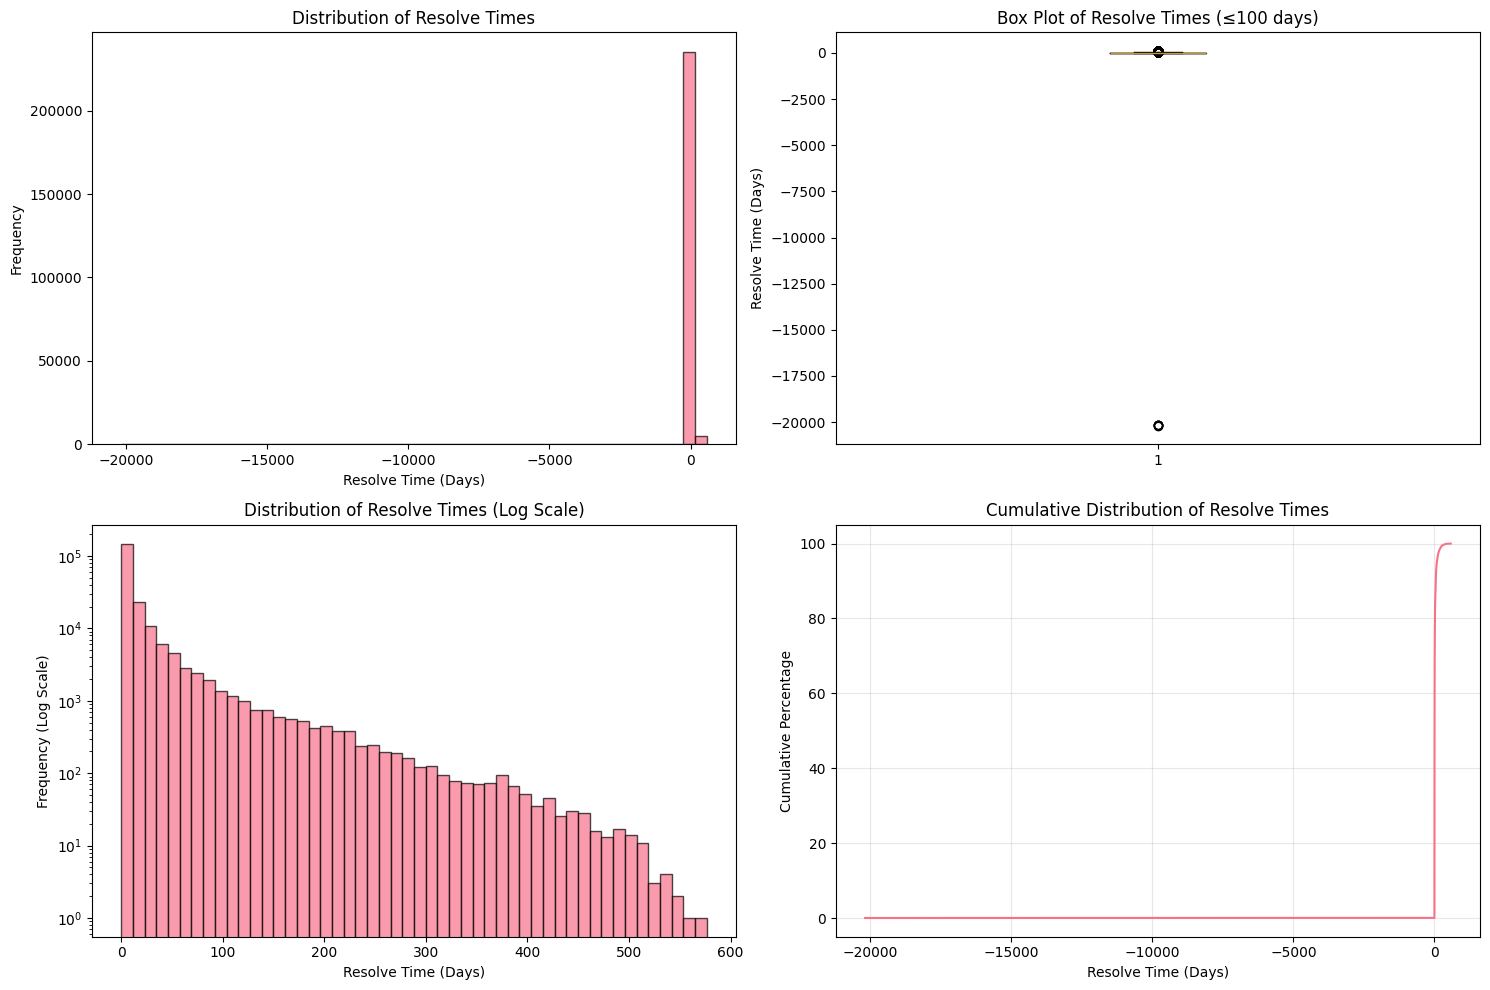

Resolve Time Percentiles:
25th percentile: 0.43 days
50th percentile: 3.39 days
75th percentile: 12.40 days
90th percentile: 42.36 days
95th percentile: 83.05 days
99th percentile: 222.34 days


In [6]:
# Visualize resolve time distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Histogram of resolve times
axes[0,0].hist(df_resolved['Resolve Time (Days)'], bins=50, alpha=0.7, edgecolor='black')
axes[0,0].set_title('Distribution of Resolve Times')
axes[0,0].set_xlabel('Resolve Time (Days)')
axes[0,0].set_ylabel('Frequency')

# Box plot of resolve times (limit to reasonable range for visualization)
resolve_times_capped = df_resolved['Resolve Time (Days)'][df_resolved['Resolve Time (Days)'] <= 100]
axes[0,1].boxplot(resolve_times_capped)
axes[0,1].set_title('Box Plot of Resolve Times (≤100 days)')
axes[0,1].set_ylabel('Resolve Time (Days)')

# Log scale histogram for better visualization of distribution
axes[1,0].hist(df_resolved['Resolve Time (Days)'][df_resolved['Resolve Time (Days)'] > 0], 
               bins=50, alpha=0.7, edgecolor='black')
axes[1,0].set_yscale('log')
axes[1,0].set_title('Distribution of Resolve Times (Log Scale)')
axes[1,0].set_xlabel('Resolve Time (Days)')
axes[1,0].set_ylabel('Frequency (Log Scale)')

# Cumulative distribution
sorted_times = np.sort(df_resolved['Resolve Time (Days)'])
cumulative_pct = np.arange(1, len(sorted_times) + 1) / len(sorted_times) * 100
axes[1,1].plot(sorted_times, cumulative_pct)
axes[1,1].set_title('Cumulative Distribution of Resolve Times')
axes[1,1].set_xlabel('Resolve Time (Days)')
axes[1,1].set_ylabel('Cumulative Percentage')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Show percentiles
percentiles = [25, 50, 75, 90, 95, 99]
print("Resolve Time Percentiles:")
for p in percentiles:
    value = np.percentile(df_resolved['Resolve Time (Days)'], p)
    print(f"{p}th percentile: {value:.2f} days")


In [7]:
# Analyze top issue types
issue_counts = df_filtered['Issue Type'].value_counts()
issue_percentages = df_filtered['Issue Type'].value_counts(normalize=True) * 100

print("=== TOP 20 ISSUE TYPES ===")
print(f"{'Issue Type':<40} {'Count':<10} {'Percentage':<10}")
print("-" * 65)
for i, (issue_type, count) in enumerate(issue_counts.head(20).items()):
    percentage = issue_percentages[issue_type]
    print(f"{issue_type:<40} {count:<10} {percentage:<10.1f}%")

print(f"\nTotal unique issue types: {len(issue_counts)}")
print(f"Top 10 issue types represent {issue_percentages.head(10).sum():.1f}% of all cases")


=== TOP 20 ISSUE TYPES ===
Issue Type                               Count      Percentage
-----------------------------------------------------------------
Property Violations                      29737      11.4      %
Trash / Recycling / Bulky Services       28447      10.9      %
Trash  Recycling  Bulky Services         25690      9.8       %
Water Service                            24132      9.2       %
A Pothole                                16664      6.4       %
Trees City Row                           13819      5.3       %
Illegal Dumping                          12538      4.8       %
Solid Waste Services                     12262      4.7       %
Snow                                     9736       3.7       %
Sewer or Stormwater                      8449       3.2       %
Vehicles and Parking                     7183       2.7       %
Street Maintenance                       6878       2.6       %
Traffic Signs and Street Markings        5277       2.0       %
Animals and 

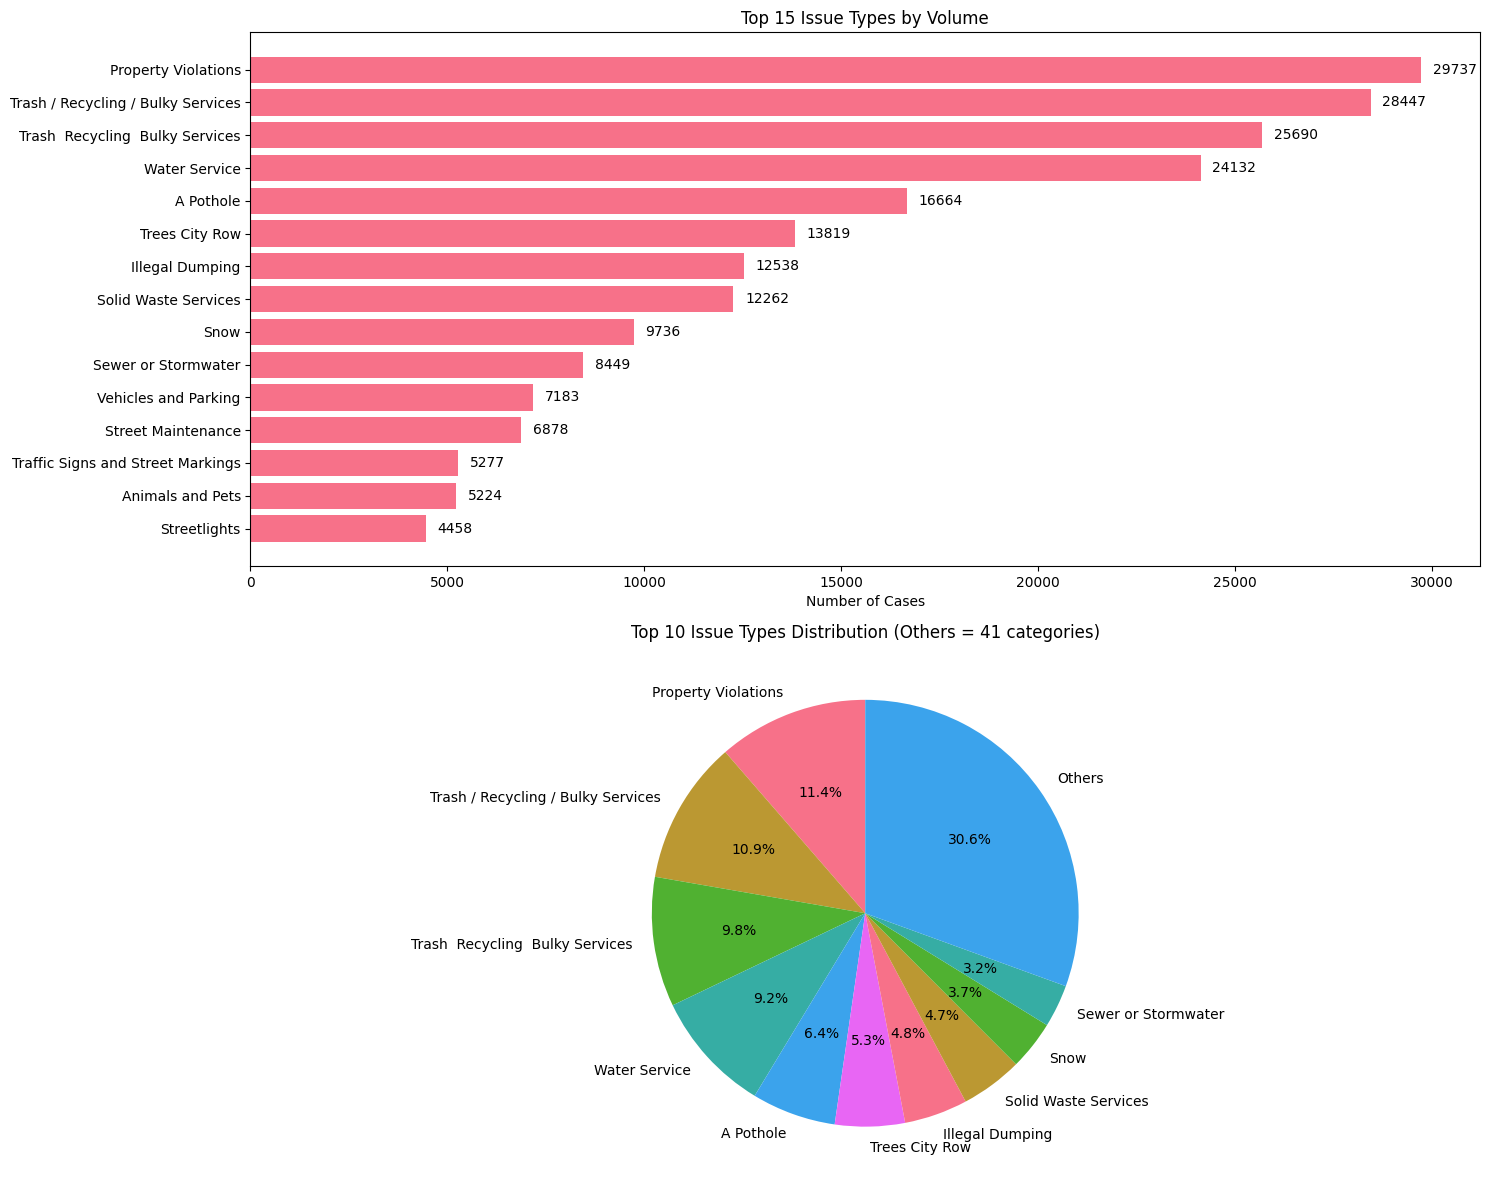

In [8]:
# Visualize top issue types
fig, axes = plt.subplots(2, 1, figsize=(15, 12))

# Bar chart of top 15 issue types
top_15 = issue_counts.head(15)
axes[0].barh(range(len(top_15)), top_15.values)
axes[0].set_yticks(range(len(top_15)))
axes[0].set_yticklabels(top_15.index)
axes[0].set_xlabel('Number of Cases')
axes[0].set_title('Top 15 Issue Types by Volume')
axes[0].invert_yaxis()

# Add value labels on bars
for i, v in enumerate(top_15.values):
    axes[0].text(v + max(top_15.values) * 0.01, i, str(v), va='center')

# Pie chart of top 10 issue types
top_10 = issue_counts.head(10)
other_count = issue_counts.iloc[10:].sum()
pie_data = list(top_10.values) + [other_count]
pie_labels = list(top_10.index) + ['Others']

axes[1].pie(pie_data, labels=pie_labels, autopct='%1.1f%%', startangle=90)
axes[1].set_title(f'Top 10 Issue Types Distribution (Others = {len(issue_counts)-10} categories)')

plt.tight_layout()
plt.show()


=== AVERAGE RESOLVE TIME BY ISSUE TYPE (Top 15 longest) ===
Issue Type                               Count    Mean     Median   Std Dev 
--------------------------------------------------------------------------------
Dangerous Buildings                      201.0    145.02   112.61   130.3   
Contract and Labor Violations            30.0     106.28   77.36    109.22  
Municipal Court                          3.0      100.94   8.3      167.43  
Vision Zero Feedback                     76.0     75.52    63.71    60.37   
Homeless Camp                            1748.0   66.79    27.63    85.11   
Zoning and Permits                       1629.0   59.94    26.65    88.02   
Graffiti                                 197.0    59.2     41.21    71.17   
Trees - City Owned                       7.0      55.42    2.16     124.91  
Land Bank Issues                         1325.0   45.79    11.26    72.33   
Short Term Rental                        683.0    43.07    15.58    64.51   
Bike Lanes  

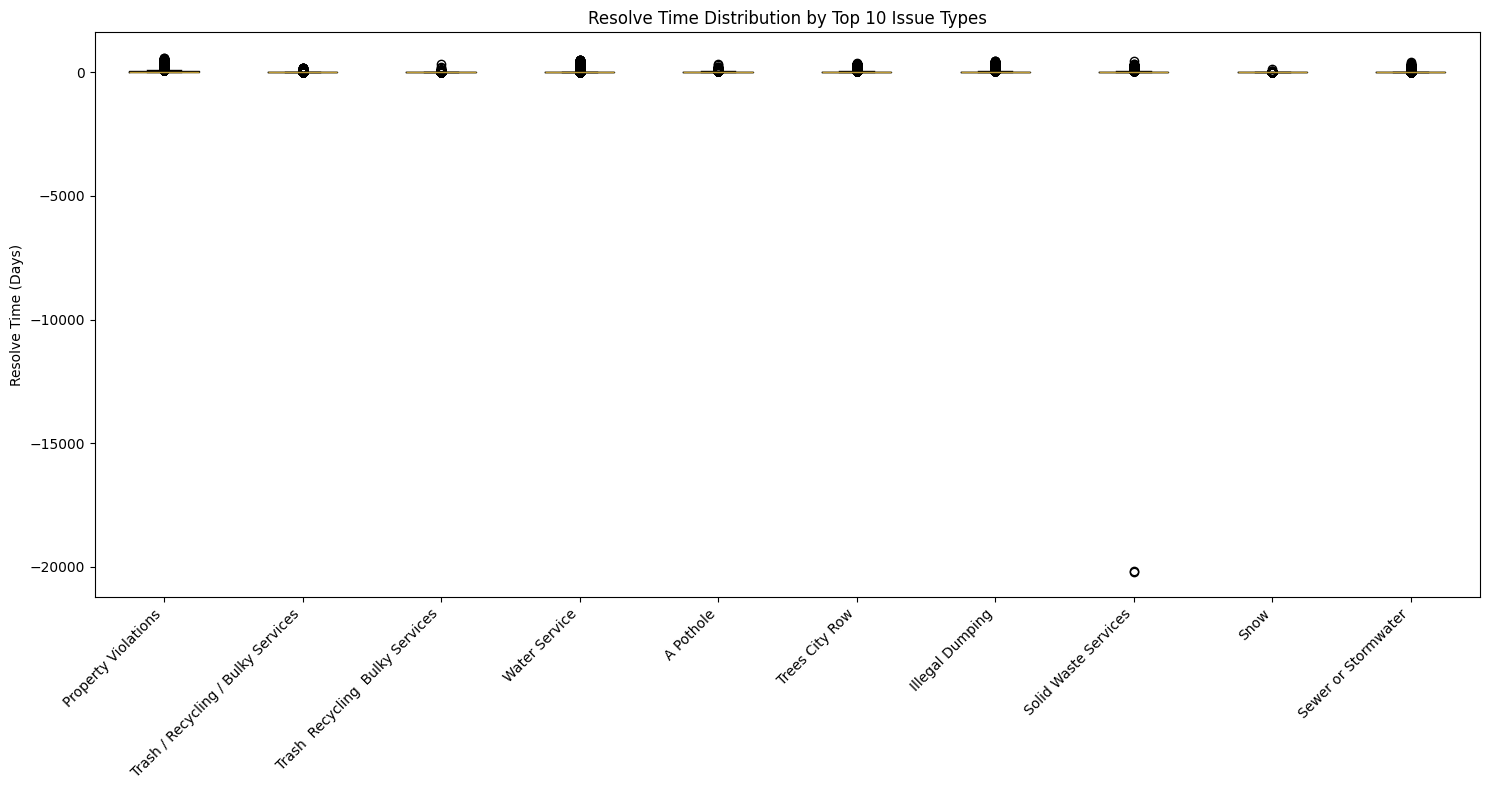

In [9]:
# Analyze resolve times by issue type
if len(df_resolved) > 0:
    resolve_by_type = df_resolved.groupby('Issue Type')['Resolve Time (Days)'].agg(['count', 'mean', 'median', 'std']).round(2)
    resolve_by_type = resolve_by_type.sort_values('mean', ascending=False)
    
    print("=== AVERAGE RESOLVE TIME BY ISSUE TYPE (Top 15 longest) ===")
    print(f"{'Issue Type':<40} {'Count':<8} {'Mean':<8} {'Median':<8} {'Std Dev':<8}")
    print("-" * 80)
    for issue_type, row in resolve_by_type.head(15).iterrows():
        print(f"{issue_type:<40} {row['count']:<8} {row['mean']:<8} {row['median']:<8} {row['std']:<8}")
    
    # Visualize resolve times for top issue types
    top_issue_types = issue_counts.head(10).index
    df_top_resolved = df_resolved[df_resolved['Issue Type'].isin(top_issue_types)]
    
    plt.figure(figsize=(15, 8))
    box_data = [df_top_resolved[df_top_resolved['Issue Type'] == issue_type]['Resolve Time (Days)'].values 
                for issue_type in top_issue_types]
    
    plt.boxplot(box_data, labels=top_issue_types)
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Resolve Time (Days)')
    plt.title('Resolve Time Distribution by Top 10 Issue Types')
    plt.tight_layout()
    plt.show()
else:
    print("No resolved cases found for analysis by issue type.")


=== CASES BY YEAR ===
2024: 157,376 cases
2025: 103,929 cases

=== CASES BY MONTH (across all years) ===
Jan: 37,833 cases
Feb: 23,257 cases
Mar: 25,940 cases
Apr: 26,565 cases
May: 24,599 cases
Jun: 28,872 cases
Jul: 30,779 cases
Aug: 16,505 cases
Sep: 12,236 cases
Oct: 13,420 cases
Nov: 10,435 cases
Dec: 10,864 cases


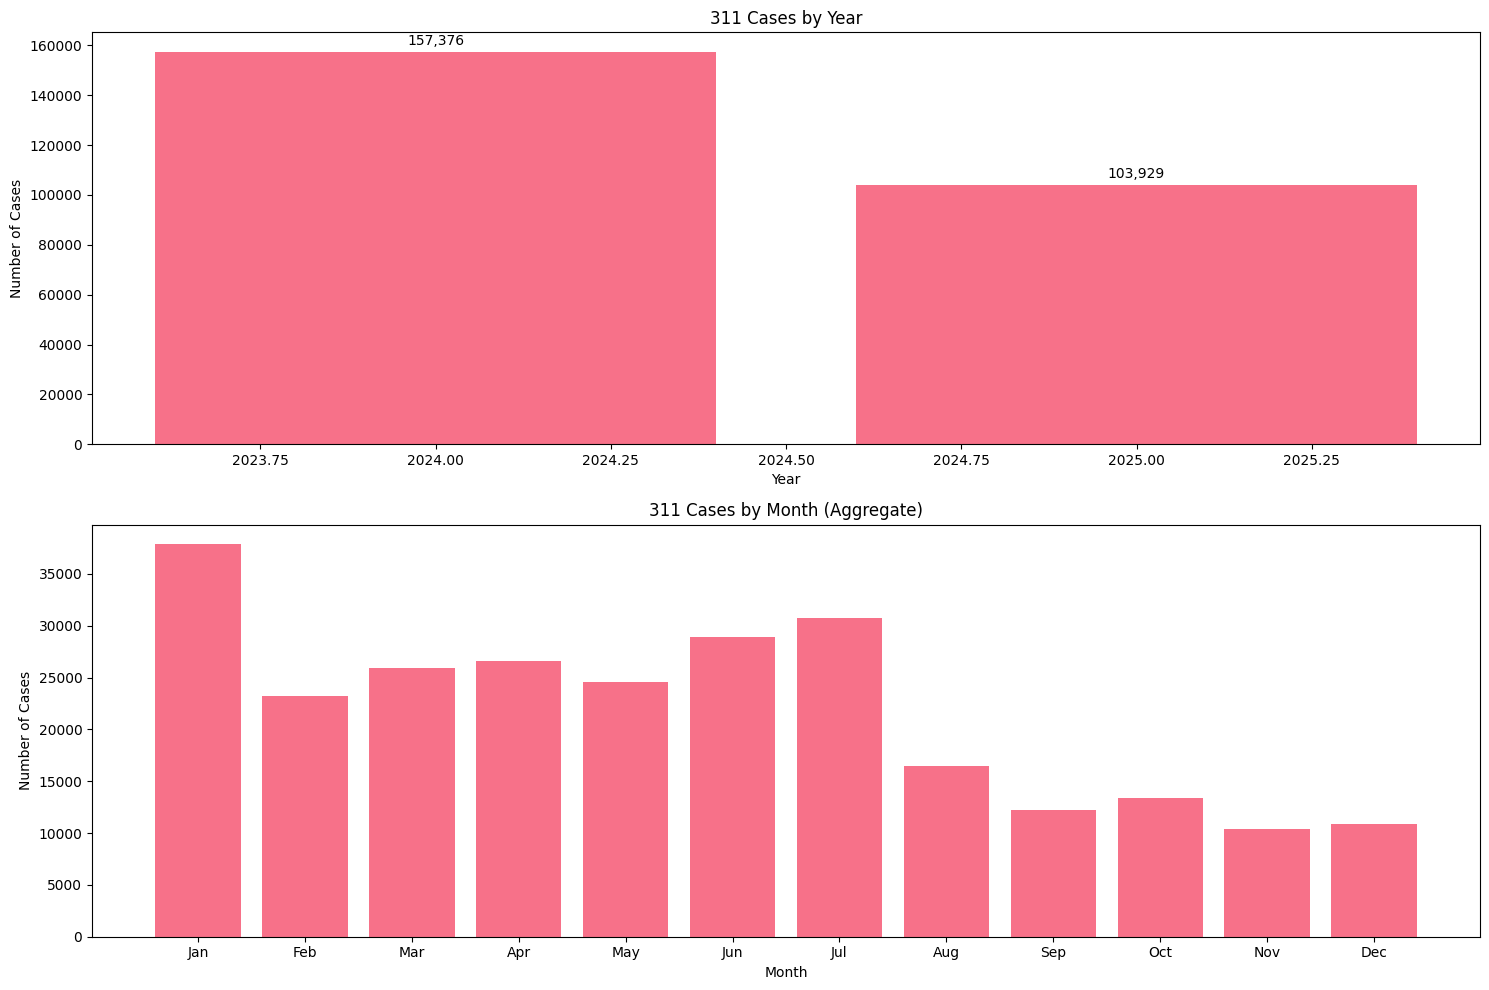

In [10]:
# Temporal analysis - cases by month/year
df_filtered['Year'] = df_filtered['Open Date-Time'].dt.year
df_filtered['Month'] = df_filtered['Open Date-Time'].dt.month
df_filtered['YearMonth'] = df_filtered['Open Date-Time'].dt.to_period('M')

# Cases by year
cases_by_year = df_filtered['Year'].value_counts().sort_index()
print("=== CASES BY YEAR ===")
for year, count in cases_by_year.items():
    print(f"{year}: {count:,} cases")

# Cases by month (aggregate across years)
cases_by_month = df_filtered['Month'].value_counts().sort_index()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

print(f"\n=== CASES BY MONTH (across all years) ===")
for month, count in cases_by_month.items():
    print(f"{month_names[month-1]}: {count:,} cases")

# Monthly trend visualization
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Cases by year
axes[0].bar(cases_by_year.index, cases_by_year.values)
axes[0].set_title('311 Cases by Year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of Cases')
for i, v in enumerate(cases_by_year.values):
    axes[0].text(cases_by_year.index[i], v + max(cases_by_year.values) * 0.01, 
                f'{v:,}', ha='center', va='bottom')

# Cases by month
axes[1].bar(range(1, 13), cases_by_month.reindex(range(1, 13), fill_value=0).values)
axes[1].set_title('311 Cases by Month (Aggregate)')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Number of Cases')
axes[1].set_xticks(range(1, 13))
axes[1].set_xticklabels(month_names)

plt.tight_layout()
plt.show()


In [11]:
# Summary statistics and insights
print("="*60)
print("           311 CALL CENTER ANALYSIS SUMMARY")
print("="*60)

print(f"\n📊 DATASET OVERVIEW:")
print(f"   • Total cases (2024-2025): {len(df_filtered):,}")
print(f"   • Cases with resolution dates: {len(df_resolved):,}")
print(f"   • Resolution rate: {len(df_resolved)/len(df_filtered)*100:.1f}%")

if len(df_resolved) > 0:
    print(f"\n⏱️  AVERAGE RESOLVE TIME:")
    print(f"   • Mean: {df_resolved['Resolve Time (Days)'].mean():.2f} days")
    print(f"   • Median: {df_resolved['Resolve Time (Days)'].median():.2f} days")
    print(f"   • 75th percentile: {np.percentile(df_resolved['Resolve Time (Days)'], 75):.2f} days")

print(f"\n🔝 TOP 5 ISSUE TYPES:")
for i, (issue_type, count) in enumerate(issue_counts.head(5).items(), 1):
    percentage = issue_percentages[issue_type]
    print(f"   {i}. {issue_type}: {count:,} cases ({percentage:.1f}%)")

print(f"\n📅 TEMPORAL PATTERNS:")
for year, count in cases_by_year.items():
    print(f"   • {year}: {count:,} cases")

print(f"\n💡 KEY INSIGHTS:")
print(f"   • {len(issue_counts)} different issue types reported")
print(f"   • Top 10 issue types account for {issue_percentages.head(10).sum():.1f}% of all cases")
if len(df_resolved) > 0:
    fast_resolution = (df_resolved['Resolve Time (Days)'] <= 1).sum()
    print(f"   • {fast_resolution:,} cases ({fast_resolution/len(df_resolved)*100:.1f}%) resolved within 1 day")
    slow_resolution = (df_resolved['Resolve Time (Days)'] > 30).sum()
    print(f"   • {slow_resolution:,} cases ({slow_resolution/len(df_resolved)*100:.1f}%) took over 30 days to resolve")

print("="*60)


           311 CALL CENTER ANALYSIS SUMMARY

📊 DATASET OVERVIEW:
   • Total cases (2024-2025): 261,305
   • Cases with resolution dates: 240,129
   • Resolution rate: 91.9%

⏱️  AVERAGE RESOLVE TIME:
   • Mean: 16.32 days
   • Median: 3.39 days
   • 75th percentile: 12.40 days

🔝 TOP 5 ISSUE TYPES:
   1. Property Violations: 29,737 cases (11.4%)
   2. Trash / Recycling / Bulky Services: 28,447 cases (10.9%)
   3. Trash  Recycling  Bulky Services: 25,690 cases (9.8%)
   4. Water Service: 24,132 cases (9.2%)
   5. A Pothole: 16,664 cases (6.4%)

📅 TEMPORAL PATTERNS:
   • 2024: 157,376 cases
   • 2025: 103,929 cases

💡 KEY INSIGHTS:
   • 51 different issue types reported
   • Top 10 issue types account for 69.4% of all cases
   • 78,832 cases (32.8%) resolved within 1 day
   • 31,612 cases (13.2%) took over 30 days to resolve
